# APS 8

Entrega: 28/11 ao final do atendimento (17:15)

In [1]:
import math
from scipy import stats
import numpy as np

## Questão 1

Assuma que $X$ seja uma variável aleatória contínua que descreve o preço de um multímetro digital em uma loja brasileira qualquer. Ainda, assuma que o preço médio seja igual a $R\$ 45,00$ e o desvio padrão, igual a $R\$45,00$ e o desvio padrão, igual a $R\$ 25,00$.

Em todos os itens a seguir, deixe claro como foi construído o novo preço em função de $X$.

Deixe todas as contas claramente indicadas.

a) Se todas as lojas brasileiras que vendem multímetro resolvessem acrescentar 15 reais no preço de cada um dos seus respectivos multímetros. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

b) Se todas as lojas brasileiras que vendem multímetro resolvessem aumentar o preço de cada um dos seus respectivos multímetros em $150\%$. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

c) Se você precisa comprar dez multímetros e deseja comprá-los todos iguais e na mesma loja. Nesse caso, qual o gasto total esperado e respectivo desvio padrão?

In [2]:
#propriedades da esperança
#E(x+d) = E(x)+d
#E(c*x) = c*E(x)

#propriedades da variância
#var(x+d) = var(x)
#var(c*x) = c**2 * var(x)

#dado c e d constantes

In [3]:
#acrescimo de 15 reais
e = 45
var = 25**2
acres = 15
print('O novo preço médio é de:',e + acres)
print('O novo desvio padrão é de:', math.sqrt(var))

O novo preço médio é de: 60
O novo desvio padrão é de: 25.0


In [4]:
#150%
acres=2.5
print('O novo preço médio é de:', acres*e)
print('O novo desvio padrão é de:', math.sqrt((acres**2)*var))

O novo preço médio é de: 112.5
O novo desvio padrão é de: 62.5


In [5]:
#comprando 10
acres=10
print('Esperança: R$',acres*e)
print('Desvio padrão: R$',math.sqrt(acres**2*var))

Esperança: R$ 450
Desvio padrão: R$ 250.0


## Questão 2

	
	
Assuma que, na disciplina Ciência dos dados, a nota final da disciplina seja função da nota média das provas $X$ e da nota média dos projetos $Y$. Assuma ainda que ambas as notas tem mesmo peso na construção da nota final na disciplina.


Considerando que a nota média dos alunos nas provas segue uma normal com média 4 e desvio padrão igual a 1,5, ou seja $ X \sim N(4 ; 2,25)$ . E que a nota média dos alunos nos projetos segue uma normal com média 7 e desvio padrão igual a 1, ou seja, $Y\sim N(7 ; 1)$.


Na prática, é razoável acreditar que haja uma associação positiva entre essas notas. Aqui, considere que a covariância entre essas notas médias é igual a $0,675$ .

Em todos os itens a seguir, deixe todas as contas claramente indicadas. 


a) Calcule a nota média final e respectivo desvio padrão.
   
 b) Considere que a nota final na disciplina Ciência dos dados segue uma distribuição com média e variância obtidas no item anterior.      Calcule a probabilidade de um aluno ser aprovado na disciplina.


In [6]:
#propriedade da esperança
#E(a*x+b*y) = a*E(x)+ b*E(y) 

#propriedade da variância
#var(a*x+b*y) = a**2* var(x) + b**2 * var(y) + 2*a*b*cov(x,y)

#dado c e d constantes

In [7]:
#mesmo peso das médias de prova e projeto:
ma = 4
da = 1.5
mp = 7
dp = 1
cov= 0.675
print('A nota média final é de:',((ma+mp)/2))
print('O desvio padrão médio é de:',(math.sqrt((0.5**2*da**2+0.5**2*dp**2+2*0.5*0.5*cov))))
#calcular um 1 - cdf até o ponto x = 5
mf = (ma+mp)/2
dpf = (math.sqrt((0.5**2*da**2+0.5**2*dp**2+2*0.5*0.5*cov)))

A nota média final é de: 5.5
O desvio padrão médio é de: 1.0723805294763609


In [8]:
#nota necessária para aprovação: 5.0
print('A probabilidade de um aluno ser aprovado na matéria é de:', (1-stats.norm.cdf(5,loc=mf,scale=dpf))*100, '%')

A probabilidade de um aluno ser aprovado na matéria é de: 67.9482578501 %


### Dataset para as questões de programação

Vamos trabalhar com o problema *House Sales in King County*, do Kaggle
[https://www.kaggle.com/harlfoxem/housesalesprediction](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

%matplotlib inline

C:\Users\denni\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
houses = pd.read_csv("casas.csv")

In [11]:
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,grade
0,540000.0,4,2.50,2600,9935,2.0,0,8
1,815000.0,3,3.75,2780,5002,2.0,0,10
2,279000.0,3,2.25,2070,7800,1.0,900,7
3,360000.0,2,2.50,1233,1244,2.0,270,7
4,309000.0,3,2.50,1990,3614,2.0,0,7


## Q3

O dataset fornecido é uma amostra extraída de um dataset maior. A amostra pode ter vindo de uma população com média de `sqft_lot` de 8250? 

Passos:

**a)** Verifique que `sqft_lot` **não** é normal.

Dica: na *APS 7* foi feito um teste de normalidade. Repita o mesmo processo

**b)**  Se `sqft_lot` fosse normal, que tipo de teste poderíamos ter usado?

**c)** Saberíamos $\mu$ para montar o t? Saberíamos $\sigma$?


**Bootstrap**:

**d)** Monte um intervalo percentil boostrap de $95\%$.

**e)** Informe os valores inferiores e superiores

**f)** Conclua o teste


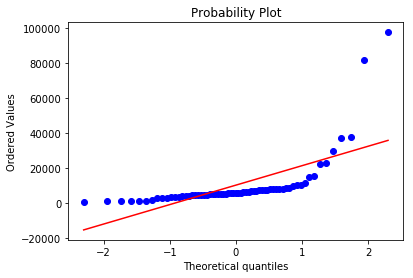

In [12]:
#verificação da coluna sqft_lot ser distribuída de acordo a uma normal
stats.probplot(houses.sqft_lot, dist='norm', plot=plt)
plt.show()

O gráfico comparativo acima mostra que a distribuição de sqft_lot, pelo menos para a amostra considerada, não é dada por uma normal. Caso fosse, um teste t-student seria possível. Há, porém, a limitação de que não sabemos as verdadeiras média e variância dessa variável. Sendo assim, esses valores teriam de ser estimados com base na amostra existente e utilizados no cálculo do t-student.

In [13]:
#bootstrap
xbarra = np.mean(houses.sqft_lot)
dp = np.std(houses.sqft_lot,ddof=1)

print("Média: ", xbarra)
print("Desvio padrão amostral: ", dp)


Média:  10292.538461538461
Desvio padrão amostral:  16122.868507454057


In [14]:
#Construção das Reamostragens da amostra mestre (dados) com reposição
n = houses.sqft_lot.count()

xbarra_Boot = []
dp_Boot = []
B = 10000
for i in range(B):
    # Gera uma reamostra dos dados _com_ reposição
    amostra = np.random.choice(houses.sqft_lot, size=n, replace=True)
    xbarraB = np.mean(amostra)
    dpB = np.std(amostra, ddof=1)
    xbarra_Boot.append(xbarraB)
    dp_Boot.append(dpB)


In [15]:
#Intervalo de confiança Bootstrap Percentil (ou Quantil)
#Confiança = 0.95

Lim_inf = np.percentile(xbarra_Boot, 2.5) #2.5% menores e 2.5% maiores
Lim_sup = np.percentile(xbarra_Boot, 97.5)
print('Limite inferior - média:', Lim_inf)
print('Limite superior - média:', Lim_sup)

Lim_inf = np.percentile(dp_Boot, 2.5)
Lim_sup = np.percentile(dp_Boot, 97.5)
print('Limite inferior - dp:', Lim_inf)
print('Limite superior - dp:', Lim_sup)


Limite inferior - média: 6925.79615385
Limite superior - média: 14597.155
Limite inferior - dp: 5964.13026567
Limite superior - dp: 23651.3704811


A média de 8250 está dentro dos percentis de média, com confiança de 95%. Sendo assim, é possível que tal amostra provém de uma população com esta média.

## Q4

Faça uma regressão que usa `sqft_living` como variável explicativa  e `price` como resultado: 

**a).** De acordo com a notação que usamos em aula, quem é $\hat{\beta_0}$ e quem é $\hat{\beta_1}$ ?

**b).** Interprete o $R^2$ , os valores $P > |t|$ e também *Prob (F-statistic)*.

**c).** Escreva a equação que expressa `price` em função de `sqft_living`.

**d).** Faça um gráfico de dispersão de `price` em função de `sqft_living`, plote a equação que encontrou no item anterior no mesmo gráfico


b0 e b1 são valores estimados para os coeficientes da reta que será o resultado da regressão linear

In [16]:
import statsmodels.api as sm

Y = houses.price
X = houses.sqft_living
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     56.21
Date:                Thu, 23 Nov 2017   Prob (F-statistic):           2.70e-10
Time:                        18:06:21   Log-Likelihood:                -892.24
No. Observations:                  65   AIC:                             1788.
Df Residuals:                      63   BIC:                             1793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.928e+04   7.44e+04      0.662      0.510   -9.95e+04    1.98e+05
sqft_living   247.0810     32.954      7.498      0.000     181.227     312.935
==============================================================================
Omnibus:                       12.716   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.432
Skew:                           0.973   Prob(JB):                      0.00121
Kurtosis:                       4.081   Cond. No.                     6.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Para valor-p muito pequeno, na regressão, para a variável a qual é responsável pela reta ser inclinada (ou não), rejeita-se H0((b1 ou bj) = 0)
<br>
O valor-p mostra nesse caso, que há inclinação na reta de tendência
</br>
<br>
r2 é a qualidade do ajuste → 0.4 é relativamente bom, cerca de 40% de precisão
</br>
<br>
O teste f indica a relevância de pelo menos uma váriavel influenciar o resultado (eixo y), caso o valor p seja pequeno
</br>
<br>
b0 é o coef const
</br>
<br>
b1 é o coef sqft_living
</br>

# y = 247.0810(x) + 49280

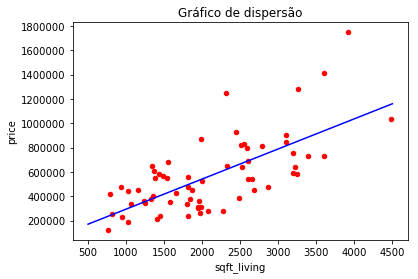

In [17]:
#Plotando o gráfico de dispersão
houses.plot.scatter('sqft_living','price', c='r')
plt.title('Gráfico de dispersão')
plt.plot((500,4500),(170000,1161144),"b-") #pares ordenados de x e y, sendo calculados y min e ymax de acordo com x min e x max


## Q5

Faça agora uma regressão múltipla que tenta prever `price` (variável explicada) em função das variáveis `sqft_lot`  e `sqft_basement` (explicativa).

Dica: inclua as duas colunas dentro de uma variável `X`, o restante não se altera em relação à regressão simples.


```python
Y = houses['price']
X = houses.loc[:, ['sqft_lot', 'sqft_basement']]
```

Pede-se:

**a).** Repita a intepretação dos valores $P > |t|$ e Prob (F-statistic) porém com duas variáveis.

O que os valores encontrados implicam para a regressão?


**b).** Escreva a função que foi encontrada pela regressão (`price` em função de  `sqft_lot`  e `sqft_basement`)

In [18]:
Y = houses.price
X = houses.loc[:, ['sqft_lot', 'sqft_basement']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9115
Date:                Thu, 23 Nov 2017   Prob (F-statistic):              0.407
Time:                        18:06:21   Log-Likelihood:                -912.03
No. Observations:                  65   AIC:                             1830.
Df Residuals:                      62   BIC:                             1837.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.237e+05   5.01e+04     10.462      0.000    4.24e+05    6.24e+05
sqft_lot          2.7668      2.383      1.161      0.250      -1.997       7.531
sqft_basement    68.6891    101.802      0.675      0.502    -134.810     272.188
==============================================================================
Omnibus:                       24.116   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.221
Skew:                           1.369   Prob(JB):                     5.02e-09
Kurtosis:                       5.572   Cond. No.                     2.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>
tobs como ponto critico → x - u/ s/raiz(n)
<br>
Quando as duas variáveis são colocadas juntas, o plano perde a significância (valor (p > t) na variável de inclinação muito alto)
<br>
O teste f (0.91) está com valor baixo, mostrando irrelevância das variáveis de entrada para o comportamento da variável resultado

# y = 2.7668(x1) + 68.6891(x2) + 523700